In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn
np.random.seed(31415)


NUM_PARTICIPANTS = 10

In [31]:
paths = glob("m*-flt")
paths = sorted(paths)
paths = paths[:-1]
print(paths)

data = [pd.read_csv(path) for path in paths]

data_np = np.array([d.to_numpy() for d in data])
classes = [i for (i, _) in enumerate(paths)]
print(classes)
print(data_np.shape)
data_np_flat = np.reshape(data_np, (NUM_PARTICIPANTS *60, 20))

['m1-flt', 'm10-flt', 'm11-flt', 'm2-flt', 'm3-flt', 'm4-flt', 'm5-flt', 'm6-flt', 'm7-flt', 'm8-flt']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(10, 60, 20)


In [32]:
means = [np.mean(x, axis=0) for x in data_np]
vars = [np.mean(x, axis=0) for x in data_np]

# Bins + MSE + Threshold

In [33]:
data_bin = []
for d in data_np:
    r_d = d.reshape(20,3,20)
    data_bin.append(np.mean(r_d, axis=1))
data_bin = np.array(data_bin)
print(data_bin.shape)

(10, 20, 20)


#### In-class distance

In [34]:
from scipy.spatial.distance import pdist

means_dists = []

for d in data_bin:
    dists = pdist(d)
    means_dists.append(np.mean(dists))

means_dists = np.array(means_dists)

#### Intra-class distance

[[74.79097318 24.23225643  0.         16.25641316 42.7416631   1.96537598
  23.12199968 23.59598625 17.43427944  9.9509531 ]
 [-1.         56.00449096 39.9660807  40.84701308 30.79596678 38.42364697
  21.542534   35.95085581 46.40922321 27.92222309]
 [-1.         -1.         64.9968221  40.43842608 16.67508616 58.59268721
   5.45639528 26.24425778 40.25370814 31.33303329]
 [-1.         -1.         -1.         63.87561182 26.82738857 42.74298481
  18.1139987  41.65240843 37.10362658 38.79667863]
 [-1.         -1.         -1.         -1.         54.06061947 17.90627327
  27.51574339 36.5966859  28.63404254 11.88428598]
 [-1.         -1.         -1.         -1.         -1.         63.39556286
   4.63499107 28.44784483 39.70844891 34.30467032]
 [-1.         -1.         -1.         -1.         -1.         -1.
  54.56330373 29.90629413 12.77797001  9.12722995]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         55.00572583 32.44590423 22.83962854]
 [-1.         -1

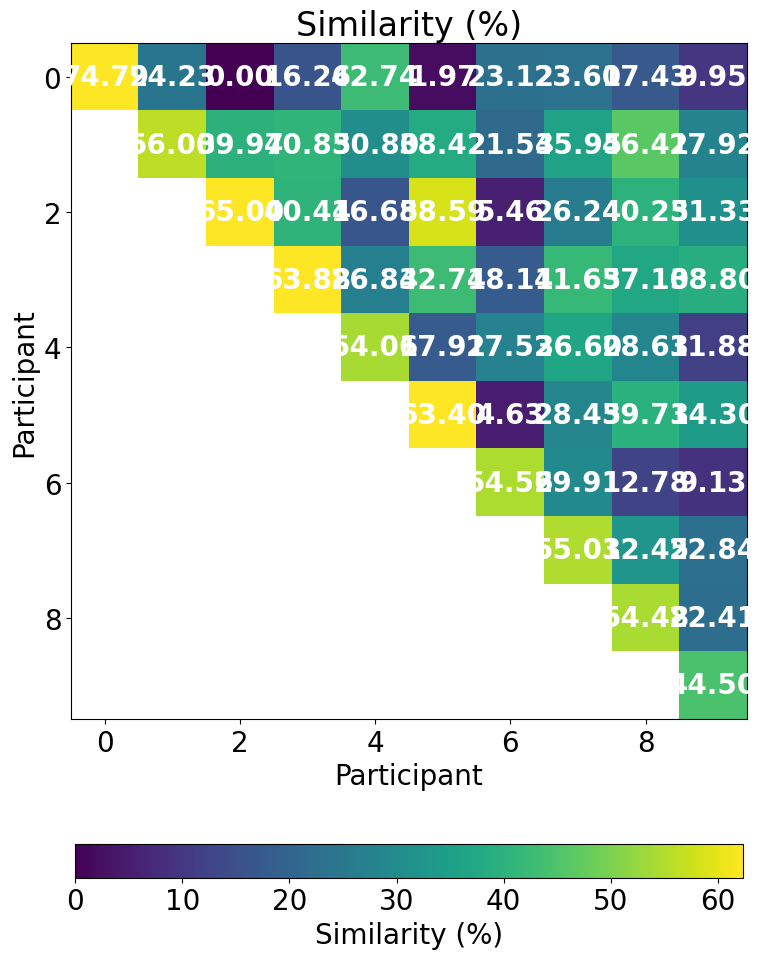

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (10,10)

distances = np.zeros((NUM_PARTICIPANTS, NUM_PARTICIPANTS))

for (i, d1) in enumerate(data_bin):
    for (j, d2) in enumerate(data_bin):
        if i > j:
            distances[i][j] = 0
            continue
        tmp = []
        for v1 in d1:
            for v2 in d2:
                tmp.append(np.linalg.norm(v1 - v2))
        distances[i][j] = np.mean(tmp)

dist_norm = (1 - (distances / np.max(distances))) * 100

dist_norm = np.where(dist_norm == 100, -1, dist_norm)
print(dist_norm)

mask = dist_norm == -1  # Mask values where absolute y < 0.5
dist_norm = np.ma.masked_array(dist_norm, mask)

plt.imshow(dist_norm, vmin=0, vmax=np.max(dist_norm)/1.2)
# Add colorbar
plt.colorbar(label='Similarity (%)', orientation="horizontal", fraction=0.04)

plt.xlabel('Participant')
plt.ylabel('Participant')
plt.title('Similarity (%)')

# Add annotations with normalized values
for i in range(dist_norm.shape[0]):
    for j in range(dist_norm.shape[1]):
        text = f'{dist_norm[i, j]:.2f}' if dist_norm[i, j] != -1 else ''
        plt.text(j, i, text, ha='center', va='center', color='w', fontweight='bold')
plt.tight_layout()
plt.show()


### Max-similarity

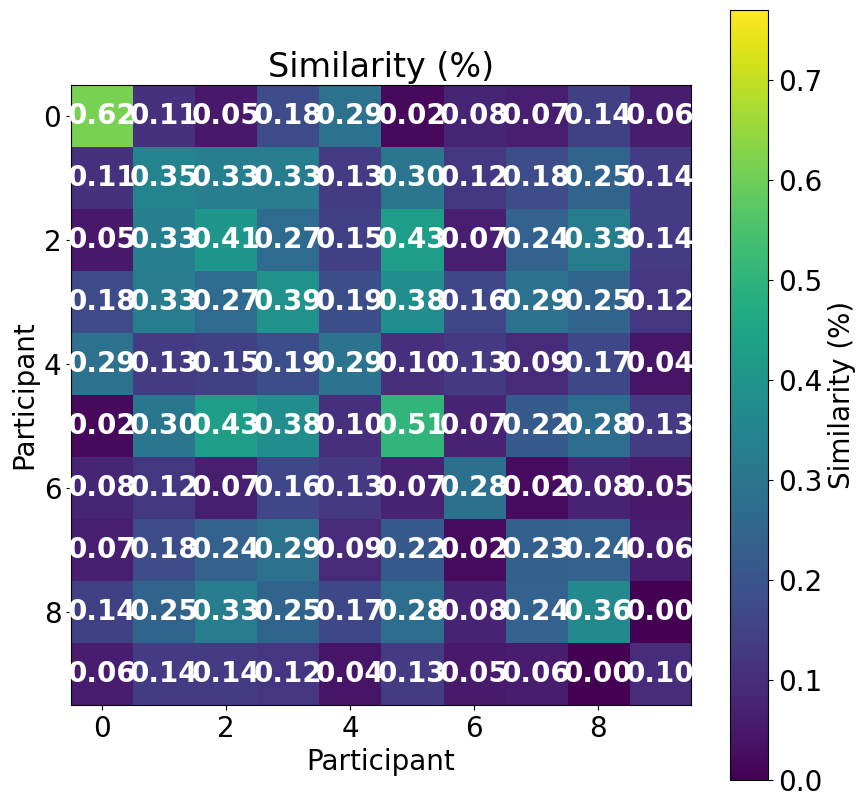

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

distances = np.zeros((NUM_PARTICIPANTS, NUM_PARTICIPANTS))

for (i, d1) in enumerate(data_bin):
    for (j, d2) in enumerate(data_bin):
        tmp = []
        for v1 in d1:
            for v2 in d2:
                tmp.append(np.linalg.norm(v1 - v2))
        distances[i][j] = np.max(tmp)

# Adjust colormap to emphasize large values

distances = (1- (distances / np.max(distances)))

plt.imshow(distances, vmin=0, vmax=np.max(distances)/0.8)

# Add colorbar
plt.colorbar(label='Similarity (%)')

plt.xlabel('Participant')
plt.ylabel('Participant')
plt.title('Similarity (%)')

# Add annotations with normalized values
for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        text = f'{distances[i, j]:.2f}' if distances[i, j] != 100 else ''
        plt.text(j, i, text, ha='center', va='center', color='w', fontweight='bold')

plt.show()


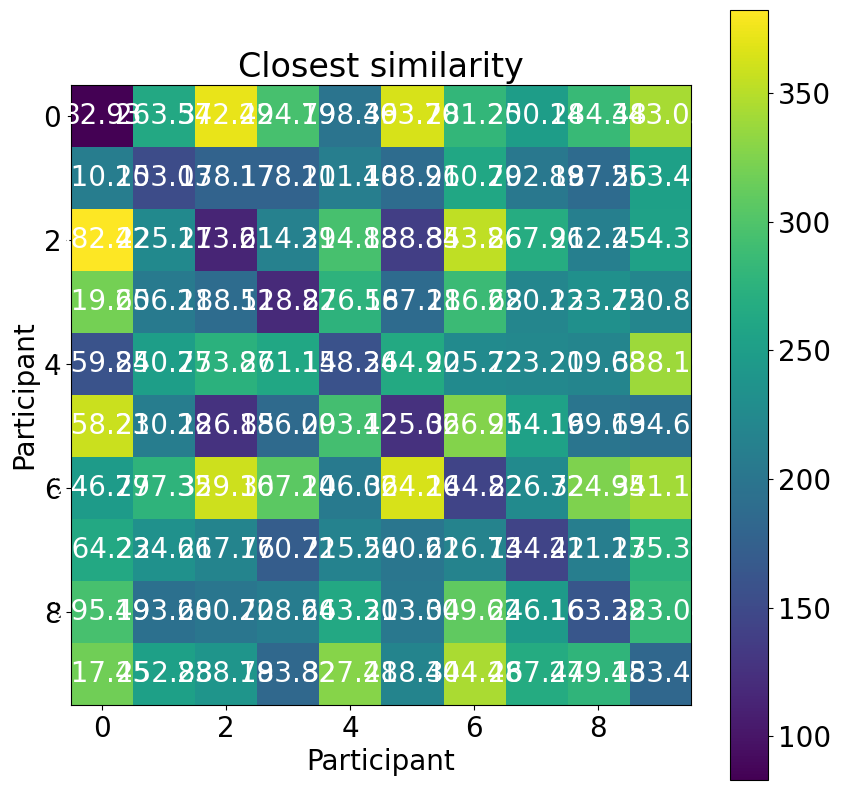

Participant 0 took 1 tries
Participant 1 took 1 tries
Participant 2 took 1 tries
Participant 3 took 1 tries
Participant 4 took 1 tries
Participant 5 took 1 tries
Participant 6 took 1 tries
Participant 7 took 1 tries
Participant 8 took 1 tries
Participant 9 took 1 tries


In [37]:
def get_dist_n_large(largest=1):
    distances = np.zeros((NUM_PARTICIPANTS, NUM_PARTICIPANTS))
    for (i, d1) in enumerate(data_bin):
        for (j, d2) in enumerate(data_bin):
            tmp = []
            for v1 in d1:
                tmp_mean = []
                for v2 in d2:
                    tmp_mean.append(np.linalg.norm(v1 - v2))
                tmp.append(np.mean(tmp_mean))
            tmp.sort(reverse=True)
            distances[i][j] = tmp[-largest]
    return distances


distances = get_dist_n_large(1)

plt.imshow(distances, cmap='viridis')

plt.colorbar()
plt.xlabel('Participant')
plt.ylabel('Participant')
plt.title('Closest similarity')


for i in range(distances.shape[0]):
    for j in range(distances.shape[1]):
        text = f'{distances[i, j]:.2f}' if distances[i, j] != 100 else ''
        plt.text(j, i, text, ha='center', va='center', color='w')

plt.show()

for (i, _) in enumerate(data_bin):
    for j in range(1, 20):
        dists = get_dist_n_large(j)[i]
        min = np.argmin(dists)
        if min == i:
            print(f"Participant {i} took {j} tries")
            break


## Classification

In [38]:
# data_flat = data_bin.reshape((120, 20))
# print(data_flat.shape)
# labels = np.array([np.repeat(x, 20) for x in classes])
# labels = np.reshape(labels, (120))
# print(labels.shape)

In [39]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(data_flat, labels, test_size=0.2, random_state=42)

# # Create and train the RandomForestClassifier
# cls = RandomForestClassifier()
# cls.fit(X_train, y_train)

# # Make predictions on the test set
# pred = cls.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, pred)


# # Calculate confusion matrix
# confusion_mat = confusion_matrix(y_test, pred)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:\n", confusion_mat)


In [40]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Calculate confusion matrix
# confusion_mat = confusion_matrix(y_test, pred)

# # Define class labels
# class_labels = np.unique(labels)

# # Plot confusion matrix as an image
# plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(len(class_labels))
# plt.xticks(tick_marks, class_labels, rotation=45)
# plt.yticks(tick_marks, class_labels)

# # Fill the matrix with values
# thresh = confusion_mat.max() / 2.
# for i in range(confusion_mat.shape[0]):
#     for j in range(confusion_mat.shape[1]):
#         plt.text(j, i, format(confusion_mat[i, j], 'd'),
#                  horizontalalignment="center",
#                  color="white" if confusion_mat[i, j] > thresh else "black")

# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.tight_layout()
# plt.show()


## Classificaiton with stratisfied split

(200, 20)
(400, 20)
--------------------------
Accuracy: 1.0
Confusion Matrix:
 [[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
--------------------------
Accuracy: 0.83
Confusion Matrix:
 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 32  3  0  0  0  0  0  0  5]
 [ 0 15 25  0  0  0  0  0  0  0]
 [ 0  0  0 30  0 10  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  0]
 [ 7  0  0  0  3  0 25  5  0  0]
 [ 0  0  0 10  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 40  0]
 [ 0 10  0  0  0  0  0  0  0 30]]
[0 1 2 3 4 5 6 7 8 9]


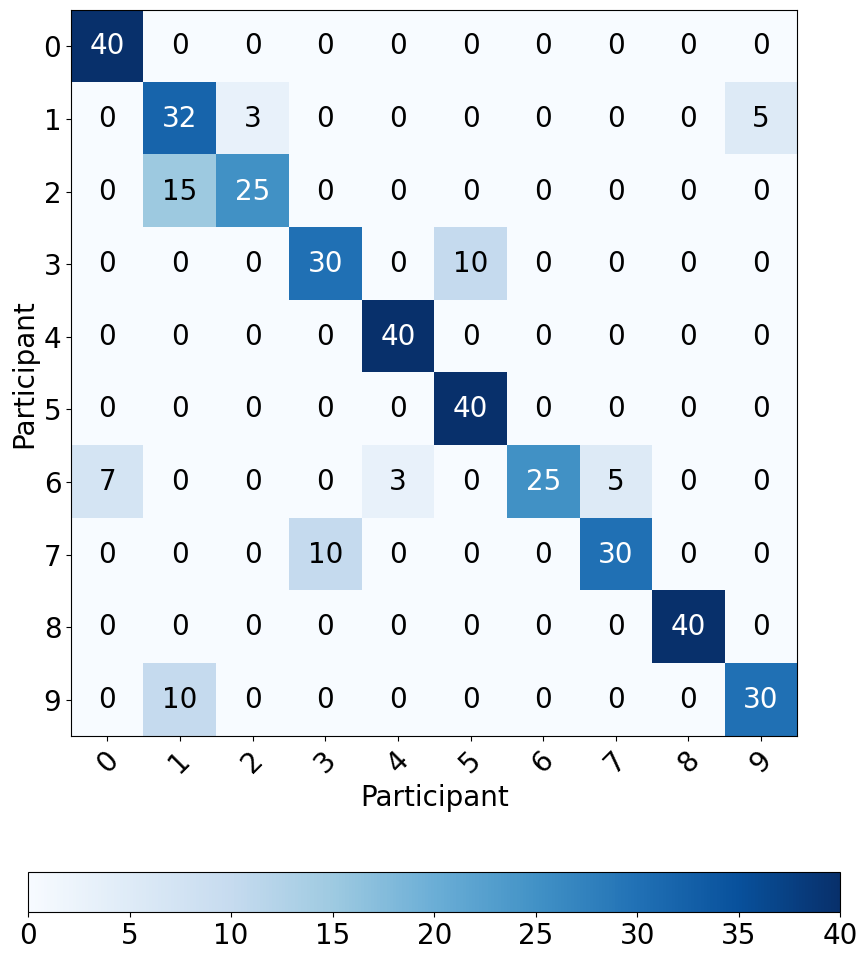

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import Normalizer, StandardScaler
plt.rcParams.update({'font.size': 20})
# Split the data into training and test sets

sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

mask = np.tile(sample_mask, NUM_PARTICIPANTS)

data_flat = np.reshape(data_np, (NUM_PARTICIPANTS * 60, 20))

labels = np.array([np.repeat(x, 60) for x in classes])
labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))
class_labels = np.unique(labels)
mask_train = (mask == 0) | (mask == 3) 



# print(data_flat.shape)
# print(labels.shape)
# print(mask_train.shape)



X_train, y_train = data_flat[mask_train], labels[mask_train]
X_test, y_test = data_flat[~mask_train], labels[~mask_train]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

# Create and train the RandomForestClassifier
cls = RandomForestClassifier(criterion="log_loss")
cls.fit(X_train, y_train)


print("--------------------------")
# Make predictions on the test set
pred = cls.predict(X_train)
accuracy = accuracy_score(y_train, pred)
confusion_mat = confusion_matrix(y_train, pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

print("--------------------------")


# Make predictions on the test set
pred = cls.predict(X_test)
accuracy = accuracy_score(y_test, pred)
confusion_mat = confusion_matrix(y_test, pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(fraction=0.045, orientation="horizontal")
tick_marks = np.arange(len(class_labels))
print(tick_marks)
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill the matrix with values
thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                horizontalalignment="center",
                verticalalignment="center",  # Add vertical alignment
                color="white" if confusion_mat[i, j] > thresh else "black")

plt.ylabel('Participant')
plt.xlabel('Participant')
plt.tight_layout()
plt.savefig("identification_confusion_matrix.pdf", bbox_inches='tight')
plt.show()

In [44]:
# Authentification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import Normalizer, StandardScaler

all_confusion_matrices = []
mean_acc = []


mean_far = []
mean_frr = []

# Split the data into training and test sets
for i in range (len(data)):
    sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

    mask = np.tile(sample_mask, NUM_PARTICIPANTS)

    data_flat = np.reshape(data_np, (NUM_PARTICIPANTS * 60, 20))

    labels = np.array([np.repeat(x, 60) for x in classes])
    labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))

    labels = np.array([1 if x == i else 0 for x in labels])


    mask_train = (mask == 0) | (mask == 3) 


    X_train, y_train = data_flat[mask_train], labels[mask_train]
    X_test, y_test = data_flat[~mask_train], labels[~mask_train]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the RandomForestClassifier
    cls = RandomForestClassifier(class_weight="balanced")
    cls.fit(X_train, y_train)


    print(f"------------P{i}--------------")
    # Make predictions on the test set
    pred = cls.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    confusion_mat = confusion_matrix(y_train, pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_mat)

    print("--------------")


    # Make predictions on the test set
    pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    mean_acc.append(accuracy)
    confusion_mat = confusion_matrix(y_test, pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    all_confusion_matrices.append(confusion_mat)

    tp_test = confusion_mat[1, 1]
    fp_test = confusion_mat[0, 1]
    tn_test = confusion_mat[0, 0]
    fn_test = confusion_mat[1, 0]

    true_positives = confusion_mat[1, 1]
    false_positives = confusion_mat[0, 1]
    true_negatives = confusion_mat[0, 0]
    false_negatives = confusion_mat[1, 0]

    # Calculating the false acceptance rate (FAR)
    far = false_positives / (false_positives + true_negatives)

    # Calculating the false rejection rate (FRR)
    frr = false_negatives / (false_negatives + true_positives)

    print("False Acceptance Rate (FAR):", far)
    print("False Rejection Rate (FRR):", frr)

    mean_far.append(far)
    mean_frr.append(frr)

print("mean ACC: ", np.mean(mean_acc))
print("mean FAR: ", np.mean(mean_far))
print("mean FRR: ", np.mean(mean_frr))

# print("overall_tp", np.mean(overall_tp))
# print("overall_fp", np.mean(overall_fp))
# print("overall_tn", np.mean(overall_tn))
# print("overall_fn", np.mean(overall_fn))


------------P0--------------
Accuracy: 1.0
Confusion Matrix:
 [[180   0]
 [  0  20]]
--------------
Accuracy: 1.0
Confusion Matrix:
 [[360   0]
 [  0  40]]
False Acceptance Rate (FAR): 0.0
False Rejection Rate (FRR): 0.0
------------P1--------------
Accuracy: 1.0
Confusion Matrix:
 [[180   0]
 [  0  20]]
--------------
Accuracy: 0.925
Confusion Matrix:
 [[360   0]
 [ 30  10]]
False Acceptance Rate (FAR): 0.0
False Rejection Rate (FRR): 0.75
------------P2--------------
Accuracy: 1.0
Confusion Matrix:
 [[180   0]
 [  0  20]]
--------------
Accuracy: 0.95
Confusion Matrix:
 [[360   0]
 [ 20  20]]
False Acceptance Rate (FAR): 0.0
False Rejection Rate (FRR): 0.5
------------P3--------------
Accuracy: 1.0
Confusion Matrix:
 [[180   0]
 [  0  20]]
--------------
Accuracy: 0.9475
Confusion Matrix:
 [[360   0]
 [ 21  19]]
False Acceptance Rate (FAR): 0.0
False Rejection Rate (FRR): 0.525
------------P4--------------
Accuracy: 1.0
Confusion Matrix:
 [[180   0]
 [  0  20]]
--------------
Accurac

In [76]:
sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

mask = np.tile(sample_mask, NUM_PARTICIPANTS)

data_flat = np.reshape(data_np, (NUM_PARTICIPANTS * 60, 20))
print(data_flat.shape)
labels = np.array([np.repeat(x, 60) for x in classes])
labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))
class_labels = np.unique(labels)
mask_train = (mask == 0) | (mask == 3)

X_train, y_train = data_flat[mask_train], labels[mask_train]
X_test, y_test = data_flat[~mask_train], labels[~mask_train]


print(X_train.shape)
print(y_train.shape)

vecs = []

for i in range(NUM_PARTICIPANTS):
    msk = y_train == i
    train = X_train[msk]
    vecs.append(np.mean(train, axis=0))

vecs = np.array(vecs)

T = 50000

pred = []
for v in X_test:
    dis = [np.linalg.norm(v - x) for x in vecs]
    cls = np.argmin(dis)
    pred.append(cls)

acc = accuracy_score(y_test, pred)
print(acc)

(600, 20)
(200, 20)
(200,)
0.5975


In [84]:
sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

mask = np.tile(sample_mask, NUM_PARTICIPANTS)

data_flat = np.reshape(data_np, (NUM_PARTICIPANTS * 60, 20))
print(data_flat.shape)
labels = np.array([np.repeat(x, 60) for x in classes])
labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))
class_labels = np.unique(labels)
mask_train = (mask == 0) | (mask == 3)

X_train, y_train = data_flat[mask_train], labels[mask_train]
X_test, y_test = data_flat[~mask_train], labels[~mask_train]


print(X_train.shape)
print(y_train.shape)

vecs = []

for i in range(NUM_PARTICIPANTS):
    msk = y_train == i
    train = X_train[msk]
    vecs.append(np.mean(train, axis=0))

vecs = np.array(vecs)

T = 100

pred = []
for (v, l) in zip(X_test, y_test):
    dis = np.linalg.norm(v - vecs[l])
    res = 0
    if (dis < T):
        res = 1
    pred.append(res)

print(y_test[0:10])
print(pred[0:10])

acc = accuracy_score(y_test, pred)
print(acc)

(600, 20)
(200, 20)
(200,)
[0 0 0 0 0 0 0 0 0 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.075


(600, 20)
(200, 20)
(200,)


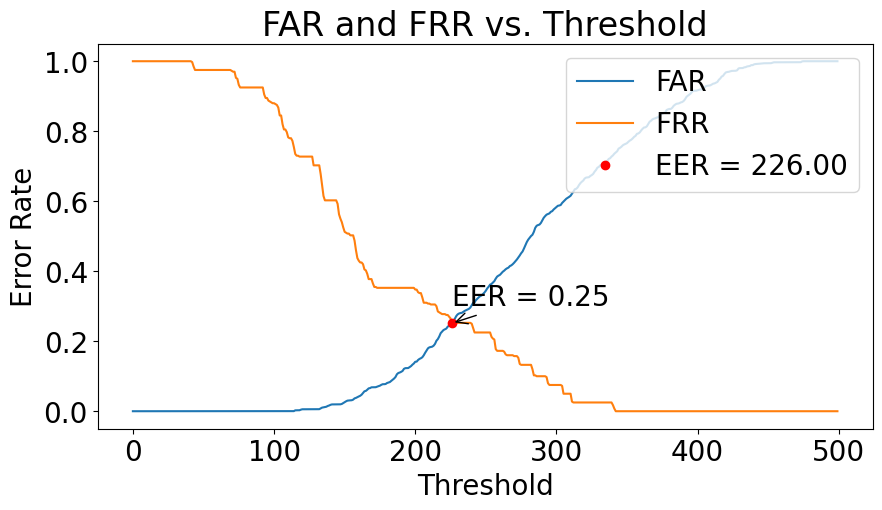

0.2513888888888889


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.rcParams["figure.figsize"] = (10,5)

sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

mask = np.tile(sample_mask, NUM_PARTICIPANTS)

data_flat = np.reshape(data_np, (NUM_PARTICIPANTS * 60, 20))
print(data_flat.shape)
labels = np.array([np.repeat(x, 60) for x in classes])
labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))
class_labels = np.unique(labels)
mask_train = (mask == 0) | (mask == 3)

X_train, y_train = data_flat[mask_train], labels[mask_train]
X_test, y_test = data_flat[~mask_train], labels[~mask_train]


print(X_train.shape)
print(y_train.shape)

vecs = []

for i in range(NUM_PARTICIPANTS):
    msk = y_train == i
    train = X_train[msk]
    vecs.append(np.mean(train, axis=0))

vecs = np.array(vecs)

fars = []
frrs = []
thresholds = []

for t in range(0, 500):
    T = t

    pred = []
    y_true = []
    for (v, l) in zip(X_test, y_test):
        for i in range(NUM_PARTICIPANTS):
            dis = np.linalg.norm(v - vecs[i])
            res = 0
            if (dis < T):
                res = 1
            # print(dis, res, l)
            pred.append(res)
            y_true.append(l == i)

    pred = np.array(pred)
    y_true = np.array(y_true)
    # y_true = np.where(y_test == i, 1, 0)

    acc = accuracy_score(y_true, pred)

    num_positive = np.sum(y_true == 1)
    num_negative = np.sum(y_true == 0)

    true_positive = np.sum((pred == 1) & (y_true == 1))
    false_positive = np.sum((pred == 1) & (y_true == 0))
    true_negative = np.sum((pred == 0) & (y_true == 0))
    false_negative = np.sum((pred == 0) & (y_true == 1))

    far = false_positive / num_negative
    frr = false_negative / num_positive
    thresholds.append(t)
    fars.append(far)
    frrs.append(frr)


eer_threshold = thresholds[np.nanargmin(np.absolute(np.subtract(fars, frrs)))]
eer = (fars[eer_threshold] + frrs[eer_threshold]) / 2

plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.plot(eer_threshold, eer, 'ro', label=f'EER = {eer_threshold:.2f}')
plt.annotate(f'EER = {eer:.2f}', (eer_threshold, eer), xytext=(eer_threshold, eer + 0.05), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.title('FAR and FRR vs. Threshold')
plt.legend(loc="upper right")
plt.savefig("FAR_FRR.pdf", bbox_inches='tight')
plt.show()
print(eer)

In [ ]:
# Authentification
from sklearn.neighbors import KNeighborsClassifier
from sklearn. gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import Normalizer, StandardScaler

all_confusion_matrices = []
mean_acc = []

# Split the data into training and test sets
for i in range (len(data)):
    sample_mask = np.array([[0]*10, [1]*10, [2]*10, [3]*10, [4]*10, [5]*10]).flatten()

    mask = np.tile(sample_mask, 6)

    data_flat = np.reshape(data_np, (360, 20))

    labels = np.array([np.repeat(x, 60) for x in classes])
    labels = np.reshape(labels, (360))

    labels = np.array([1 if x == i else 0 for x in labels])


    mask_train = (mask == 0) | (mask == 3) 


    X_train, y_train = data_flat[mask_train], labels[mask_train]
    X_test, y_test = data_flat[~mask_train], labels[~mask_train]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the RandomForestClassifier
    cls = KNeighborsClassifier()
    cls.fit(X_train, y_train)


    # print(f"------------P{i}--------------")
    # # Make predictions on the test set
    # pred = cls.predict(X_train)
    # accuracy = accuracy_score(y_train, pred)
    # confusion_mat = confusion_matrix(y_train, pred)
    # print("Accuracy:", accuracy)
    # print("Confusion Matrix:\n", confusion_mat)

    # print("--------------")


    # # Make predictions on the test set
    pred = cls.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    mean_acc.append(accuracy)
    # confusion_mat = confusion_matrix(y_test, pred)
    # print("Accuracy:", accuracy)
    # print("Confusion Matrix:\n", confusion_mat)
    # all_confusion_matrices.append(confusion_mat)

print("mean ACC", np.mean(mean_acc))



mean ACC 0.9569444444444444


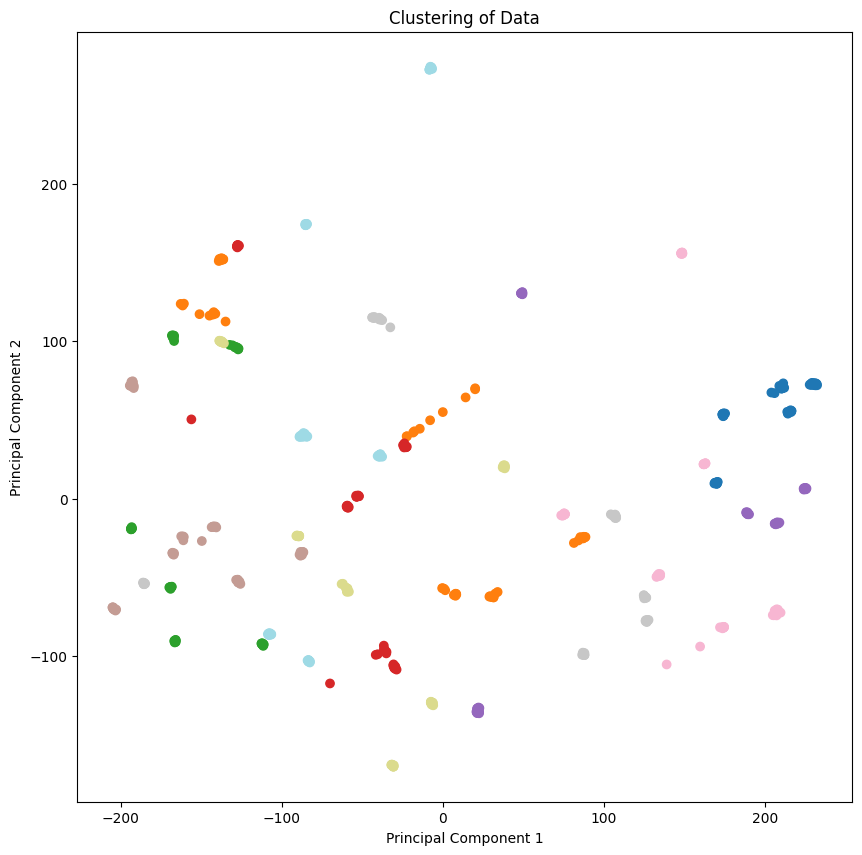

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


labels = np.array([np.repeat(x, 60) for x in classes])
labels = np.reshape(labels, (NUM_PARTICIPANTS * 60))

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data_np_flat)

# Define a custom color map with distinct colors
color_map = plt.get_cmap('tab20')

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap=color_map)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Data')
plt.show()



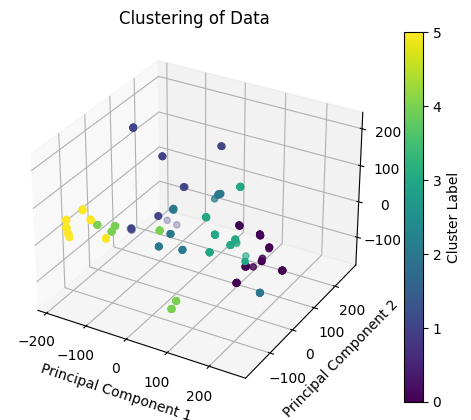

In [ ]:

# Plot the clusters using actual labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Clustering of Data')

# Create a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Assuming you have your data stored in a variable called 'data' with shape (120, 20)
# Assuming you have the actual labels stored in a variable called 'labels' with shape (120,)


# Create a scatter plot of the clusters using actual labels in 3D
fig = go.Figure(data=go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
))

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
    ),
    title='Clustering of Data',
    height=800
)

# Show the interactive 3D plot
fig.show()
